# **Online Game Behaviour Prediction**



Online gaming has evolved into a massive global industry, engaging millions of players daily. Understanding and predicting player behavior has become critical for improving user experiences, enhancing player retention, and optimizing monetization strategies.
This project focuses on analyzing player demographic and behavioral data to predict online gaming engagement levels.
By applying machine learning techniques, we aim to uncover key patterns and build predictive models that can help game developers and marketers make data-driven decisions to personalize content and boost user satisfaction.

### **DATASET INFORMATION**

For this project, we used the **Predict Online Gaming Behavior Dataset** sourced from Kaggle:

🔗 [Kaggle Dataset Link](https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset/data)

This dataset contains around 40,000 rows, labeled based on their engagement level in online gaming. It provides a diverse collection of demographic details, gaming behavior metrics, and psychological traits, making it ideal for building predictive models to analyze and forecast player engagement.

### Key Highlights:

Multi-class classification: Highly Engaged (2), Moderately Engaged (1), Low Engaged (0)

Each entry includes demographics, gaming behavior metrics, psychological scores, and a corresponding engagement label

# Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/GamingDataset/online_gaming_behavior_dataset.csv')
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


# Data Exploration

In [ ]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  int64  
 3   Location                   40034 non-null  int64  
 4   GameGenre                  40034 non-null  int64  
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  int64  
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.0 MB


# Drop Missing Values

In [ ]:
# Drop rows with missing values in the target variables
df = df.dropna(subset=['EngagementLevel', 'InGamePurchases', 'GameGenre'])

# EDA: Distribution of Engagement Level

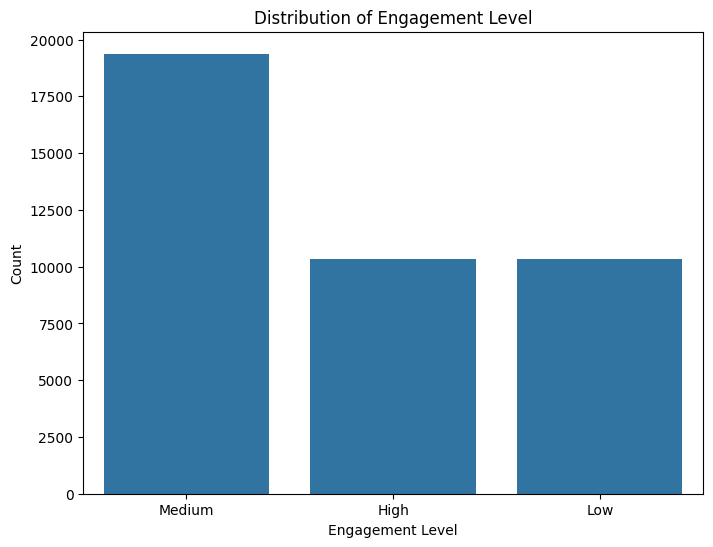

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EngagementLevel')
plt.title('Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()

This bar chart visualizes the frequency of each engagement level among players. The dataset is categorized into three engagement levels: Medium, High, and Low.

Medium engagement dominates, with the highest number of players (~19,000).

High and Low engagement levels are almost equal, each having just over 10,000 players.

This distribution suggests a moderately balanced dataset but slightly skewed toward Medium engagement, which may influence model training.

# EDA: Distribution of In-Game Purchases

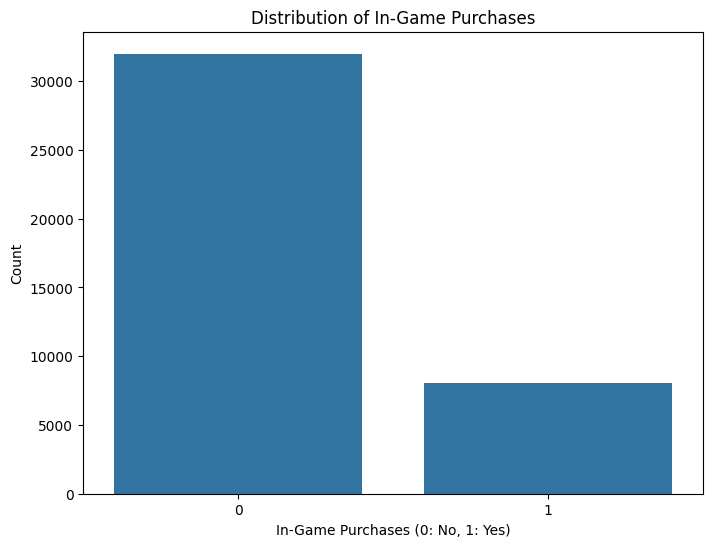

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InGamePurchases')
plt.title('Distribution of In-Game Purchases')
plt.xlabel('In-Game Purchases (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

This bar chart displays how many players have made in-game purchases.

The vast majority of players (~32,000) have not made any purchases (labeled 0).

A smaller group (~8,000) have made at least one in-game purchase (labeled 1).

This indicates a strong skew toward non-purchasing behavior, which may impact models predicting spending patterns or monetization strategies.

# EDA: Distribution of Game Genre

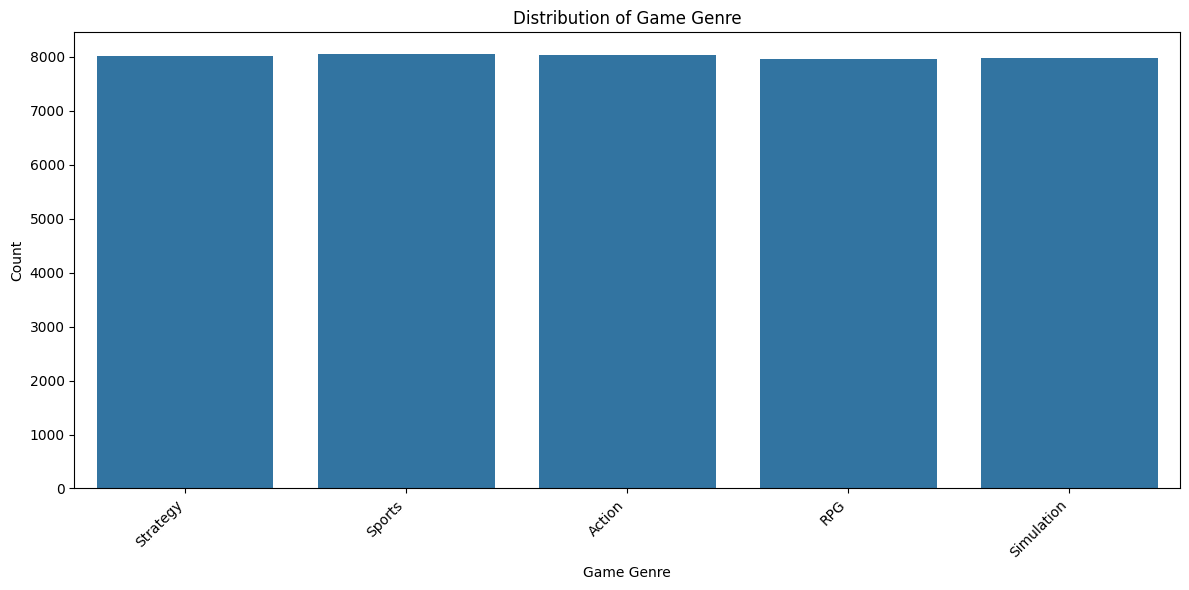

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='GameGenre')
plt.title('Distribution of Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart shows the distribution of players' favorite game genres.

The genres include Strategy, Sports, Action, RPG, and Simulation.

All genres are almost equally popular, each attracting around 8,000 players.

This balanced distribution suggests that no single genre dominates player preference, making it ideal for modeling without heavy genre bias.

# EDA: Average Play Time by Engagement Level

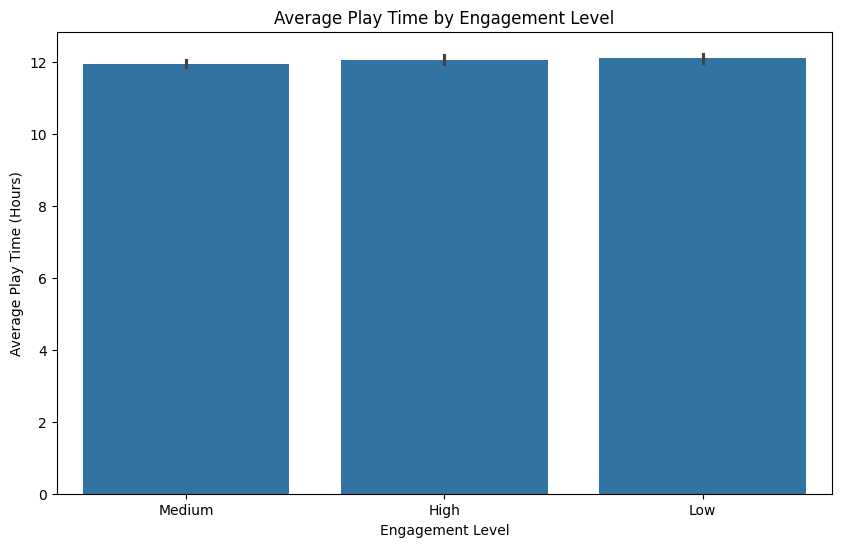

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='EngagementLevel', y='PlayTimeHours')
plt.title('Average Play Time by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Average Play Time (Hours)')
plt.show()

This bar chart compares the average weekly playtime across different engagement levels.

Players categorized as Medium, High, and Low engaged all show a similar average playtime of around 12 hours per week.

There is no significant variation in average playtime between the engagement levels, suggesting that factors other than just playtime might influence engagement categorization.

# EDA: Purchase Rate by Engagement Level

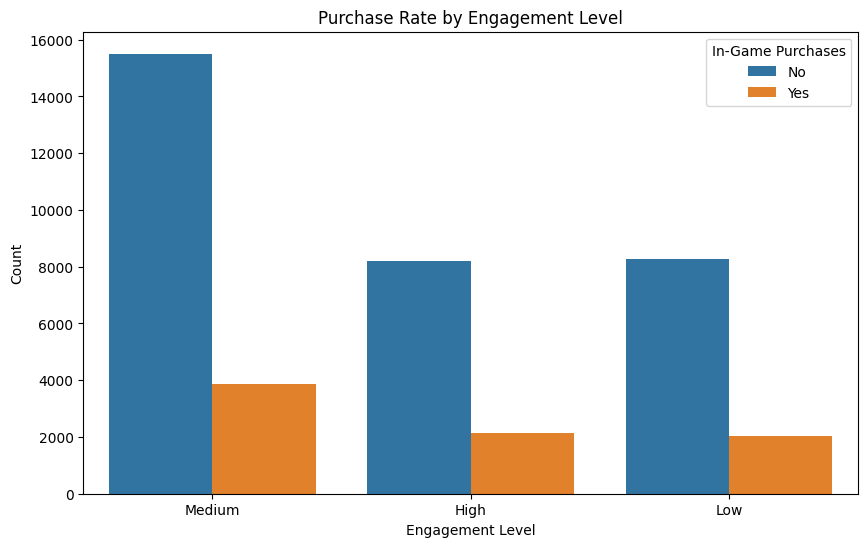

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EngagementLevel', hue='InGamePurchases')
plt.title('Purchase Rate by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.legend(title='In-Game Purchases', labels=['No', 'Yes'])
plt.show()

This bar chart illustrates the relationship between engagement levels and in-game purchasing behavior.

Across all engagement levels (Medium, High, Low), players who did not make in-game purchases outnumber those who did.

Medium engagement players show the highest absolute number of purchases, but overall, the majority in each group did not purchase items.

The difference between purchasers and non-purchasers is consistent across all engagement levels.

# Data Cleaning and Label Encoding

In [ ]:
# Handle missing values by filling with the mode (most frequent value)
for col in ['Gender', 'Location', 'GameDifficulty']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-10-22997b75176c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Define explicit mappings for each categorical column
gender_mapping = {'Female': 0, 'Male': 1}
location_mapping = {'USA': 0, 'Europe': 1, 'Asia': 2, 'Other': 3}
difficulty_mapping = {'Easy': 0, 'Medium': 1, 'Hard': 2}
engagement_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
purchases_mapping = {0: 0, 1: 1}  # Assuming 0 for no purchase, 1 for purchase
genre_mapping = {'Action': 0, 'Strategy': 1, 'RPG': 2, 'Sports': 3, 'Adventure': 4, 'Simulation': 5, 'Puzzle': 6, 'Other': 7}

In [ ]:
# Apply the mappings
df['Gender'] = df['Gender'].map(gender_mapping)
df['Location'] = df['Location'].map(location_mapping)
df['GameDifficulty'] = df['GameDifficulty'].map(difficulty_mapping)
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_mapping)
df['InGamePurchases'] = df['InGamePurchases'].map(purchases_mapping)
df['GameGenre'] = df['GameGenre'].map(genre_mapping)

# Convert Columns to Numeric Types

In [ ]:
# Convert columns to appropriate types, coercing errors to NaN
for col in ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop Rows with Missing Values

In [ ]:
# Drop rows with missing values after type conversion
df.dropna(inplace=True)

# Feature Scaling

In [ ]:
# Define features and target variable for engagement level
feature_cols = ['Age', 'Gender', 'Location', 'PlayTimeHours', 'InGamePurchases',
                'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
                'PlayerLevel', 'AchievementsUnlocked']
X = df[feature_cols]

In [ ]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_engage = df['EngagementLevel']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_engage, test_size=0.2, random_state=42, stratify=y_engage)

# Prepare Data for In-Game Purchases Prediction

In [ ]:
# Define features and target variable for in-game purchases
purchase_features = ['Age', 'Gender', 'Location', 'PlayTimeHours', 'GameDifficulty',
                     'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
X_purchase = df[purchase_features]
y_purchase = df['InGamePurchases']

In [ ]:
# Split data into training and testing sets
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_purchase, y_purchase, test_size=0.2, random_state=42, stratify=y_purchase)

In [ ]:
# Scale features using StandardScaler
scaler_p = StandardScaler()
X_train_p_scaled = scaler_p.fit_transform(X_train_p)
X_test_p_scaled = scaler_p.transform(X_test_p)

# Define Model Training and Evaluation Function

In [ ]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test, task_name, label_names, param_grid):
    """
    Trains and evaluates a given model using GridSearchCV for hyperparameter tuning.

    Args:
        model: The model to train and evaluate.
        X_train: Training data features.
        X_test: Testing data features.
        y_train: Training data labels.
        y_test: Testing data labels.
        task_name: Name of the task (e.g., 'Engagement Level').
        label_names: Names of the classes for classification report.
        param_grid: Hyperparameter grid for GridSearchCV.

    Returns:
        A tuple containing the best model and its accuracy.
    """
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print best parameters and accuracy
    print(f"\n{task_name} - Best Parameters:", grid_search.best_params_)
    print(f"{task_name} - Accuracy:", accuracy)

    # Print classification report
    print(f"{task_name} - Classification Report:\n", classification_report(y_test, y_pred, target_names=label_names))

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_names)
    plt.title(f'Confusion Matrix: {type(model).__name__} ({task_name})')
    plt.show()

    return best_model, accuracy

# Define Hyperparameter Grids

In [ ]:
# Define hyperparameter grids for different models
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0],
    'solver': ['liblinear']  # Add solver for Logistic Regression
}

param_grid_svc = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf']
}

# Model Training and Evaluation for Engagement Level

In [ ]:
# Dictionary to store models and their accuracies
models_engage = {}
accuracies_engage = {}

In [ ]:
# Define models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)


Evaluating Engagement Level Models:

Engagement Level (RandomForest) - Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Engagement Level (RandomForest) - Accuracy: 0.916822780067441
Engagement Level (RandomForest) - Classification Report:
               precision    recall  f1-score   support

         Low       0.92      0.89      0.90      2065
      Medium       0.91      0.95      0.93      3875
        High       0.93      0.88      0.90      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



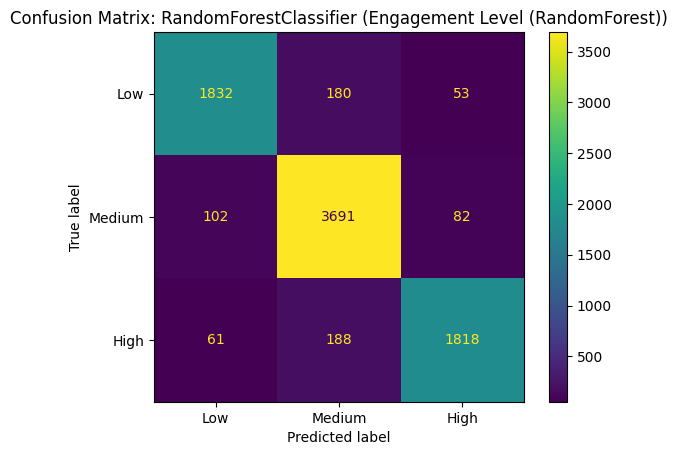


Engagement Level (GradientBoosting) - Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Engagement Level (GradientBoosting) - Accuracy: 0.9176970151117771
Engagement Level (GradientBoosting) - Classification Report:
               precision    recall  f1-score   support

         Low       0.92      0.89      0.90      2065
      Medium       0.91      0.95      0.93      3875
        High       0.93      0.89      0.91      2067

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



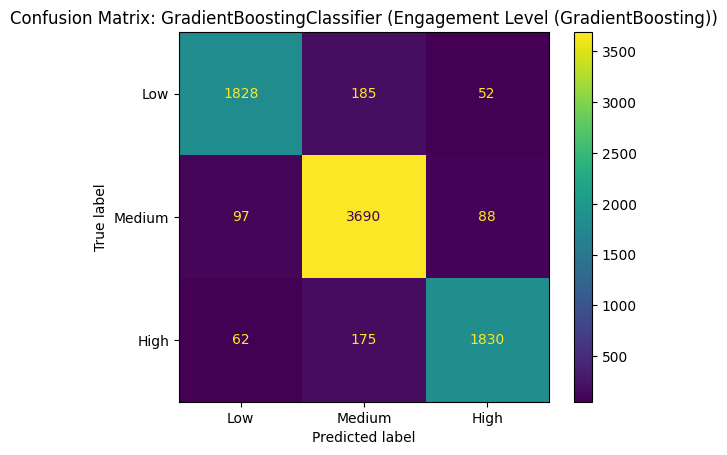


Engagement Level (LogisticRegression) - Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Engagement Level (LogisticRegression) - Accuracy: 0.829024603471962
Engagement Level (LogisticRegression) - Classification Report:
               precision    recall  f1-score   support

         Low       0.81      0.71      0.76      2065
      Medium       0.81      0.89      0.85      3875
        High       0.89      0.84      0.86      2067

    accuracy                           0.83      8007
   macro avg       0.84      0.81      0.82      8007
weighted avg       0.83      0.83      0.83      8007



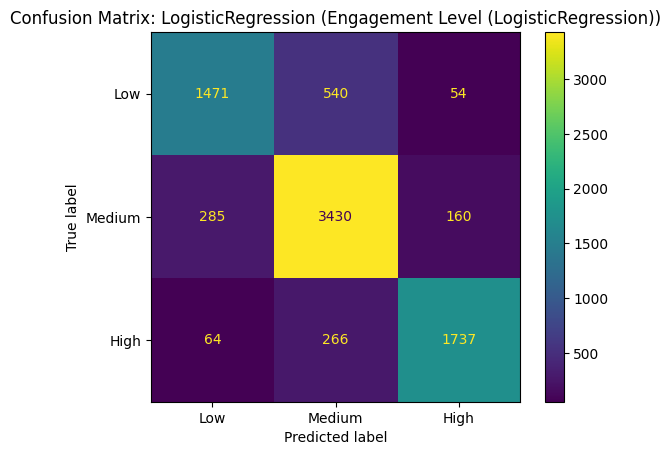


Engagement Level (SVC) - Best Parameters: {'C': 1.0, 'kernel': 'rbf'}
Engagement Level (SVC) - Accuracy: 0.9007118771075309
Engagement Level (SVC) - Classification Report:
               precision    recall  f1-score   support

         Low       0.90      0.85      0.88      2065
      Medium       0.88      0.95      0.91      3875
        High       0.93      0.86      0.90      2067

    accuracy                           0.90      8007
   macro avg       0.91      0.89      0.90      8007
weighted avg       0.90      0.90      0.90      8007



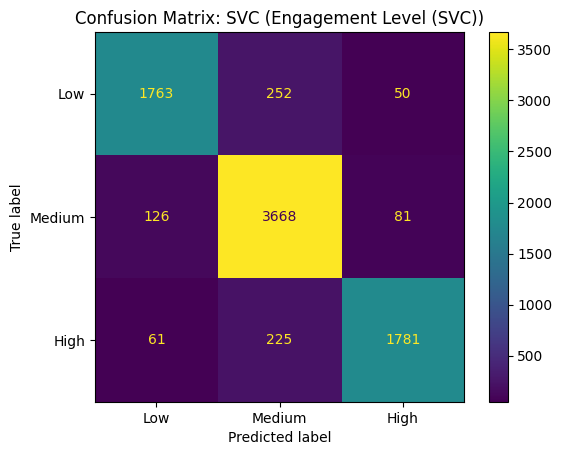

In [ ]:
print("\nEvaluating Engagement Level Models:")
label_names_engage = ['Low', 'Medium', 'High']

# Train and evaluate Random Forest
best_rf_engage, accuracies_engage['RandomForest'] = train_and_evaluate(rf, X_train, X_test, y_train, y_test, 'Engagement Level (RandomForest)', label_names_engage, param_grid_rf)
models_engage['RandomForest'] = best_rf_engage

# Train and evaluate Gradient Boosting
best_gb_engage, accuracies_engage['GradientBoosting'] = train_and_evaluate(gb, X_train, X_test, y_train, y_test, 'Engagement Level (GradientBoosting)', label_names_engage, param_grid_gb)
models_engage['GradientBoosting'] = best_gb_engage

# Train and evaluate Logistic Regression
best_lr_engage, accuracies_engage['LogisticRegression'] = train_and_evaluate(lr, X_train, X_test, y_train, y_test, 'Engagement Level (LogisticRegression)', label_names_engage, param_grid_lr)
models_engage['LogisticRegression'] = best_lr_engage

# Train and evaluate SVC
best_svc_engage, accuracies_engage['SVC'] = train_and_evaluate(svc, X_train, X_test, y_train, y_test, 'Engagement Level (SVC)', label_names_engage, param_grid_svc)
models_engage['SVC'] = best_svc_engage

1. Gradient Boosting Classifier
Accuracy: 91.77%

Best parameters: learning_rate=0.1, max_depth=5, n_estimators=100

F1-Scores:

Low: 0.90

Medium: 0.93

High: 0.91

Strength: Highest overall accuracy and consistent performance across all classes

2. Random Forest Classifier
Accuracy: 91.68%

Best parameters: max_depth=20, n_estimators=200, min_samples_split=5

F1-Scores:

Low: 0.90

Medium: 0.93

High: 0.90

Strength: Matches Gradient Boosting, slightly lower recall for "High"

3. Support Vector Classifier (SVC)
Accuracy: 90.07%

Best parameters: C=1.0, kernel='rbf'

F1-Scores:

Low: 0.88

Medium: 0.91

High: 0.90

Strength: Performs well, especially for Medium class

Limitation: Higher misclassifications in "Low"

4. Logistic Regression
Accuracy: 82.90%

Best parameters: C=0.1, penalty='l1', solver='liblinear'

F1-Scores:

Low: 0.76

Medium: 0.85

High: 0.86

Limitation: Lowest precision/recall across all labels, especially "Low"

Best Model: Gradient Boosting
Most balanced and accurate model for predicting engagement levels.

Recommended for deployment or further tuning.

# Model Training and Evaluation for In-Game Purchases

In [ ]:
# Dictionary to store models and their accuracies
models_purchases = {}
accuracies_purchases = {}

In [ ]:
# Define models
rf_p = RandomForestClassifier(random_state=42)
gb_p = GradientBoostingClassifier(random_state=42)
lr_p = LogisticRegression(random_state=42)
svc_p = SVC(random_state=42)


Evaluating In-Game Purchases Models:

In-Game Purchases (RandomForest) - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
In-Game Purchases (RandomForest) - Accuracy: 0.7991757212439116
In-Game Purchases (RandomForest) - Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.80      1.00      0.89      6399
    Purchase       0.00      0.00      0.00      1608

    accuracy                           0.80      8007
   macro avg       0.40      0.50      0.44      8007
weighted avg       0.64      0.80      0.71      8007



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


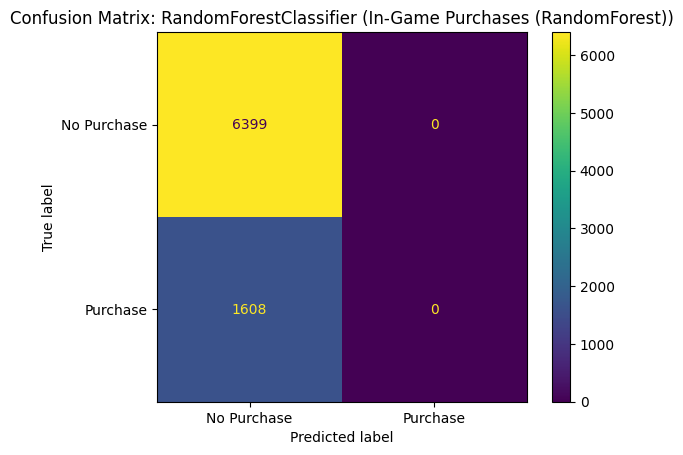


In-Game Purchases (GradientBoosting) - Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
In-Game Purchases (GradientBoosting) - Accuracy: 0.7991757212439116
In-Game Purchases (GradientBoosting) - Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.80      1.00      0.89      6399
    Purchase       0.00      0.00      0.00      1608

    accuracy                           0.80      8007
   macro avg       0.40      0.50      0.44      8007
weighted avg       0.64      0.80      0.71      8007



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


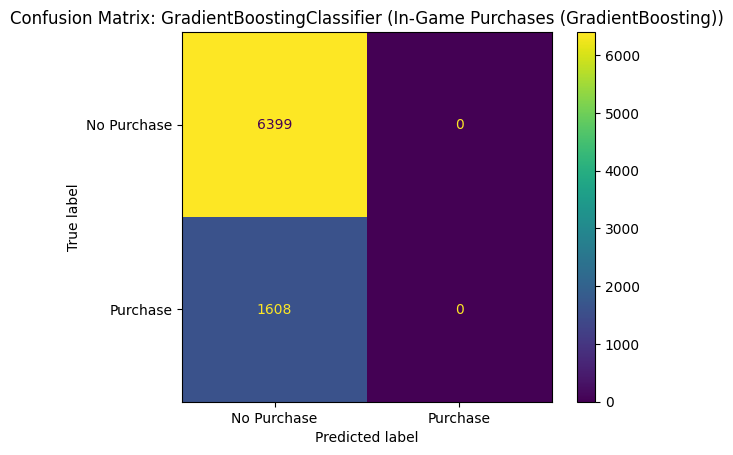


In-Game Purchases (LogisticRegression) - Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
In-Game Purchases (LogisticRegression) - Accuracy: 0.7991757212439116
In-Game Purchases (LogisticRegression) - Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.80      1.00      0.89      6399
    Purchase       0.00      0.00      0.00      1608

    accuracy                           0.80      8007
   macro avg       0.40      0.50      0.44      8007
weighted avg       0.64      0.80      0.71      8007



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


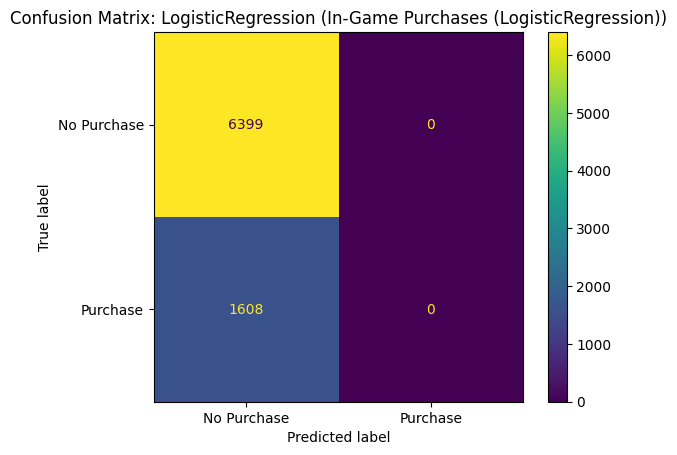


In-Game Purchases (SVC) - Best Parameters: {'C': 0.1, 'kernel': 'linear'}
In-Game Purchases (SVC) - Accuracy: 0.7991757212439116
In-Game Purchases (SVC) - Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.80      1.00      0.89      6399
    Purchase       0.00      0.00      0.00      1608

    accuracy                           0.80      8007
   macro avg       0.40      0.50      0.44      8007
weighted avg       0.64      0.80      0.71      8007



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


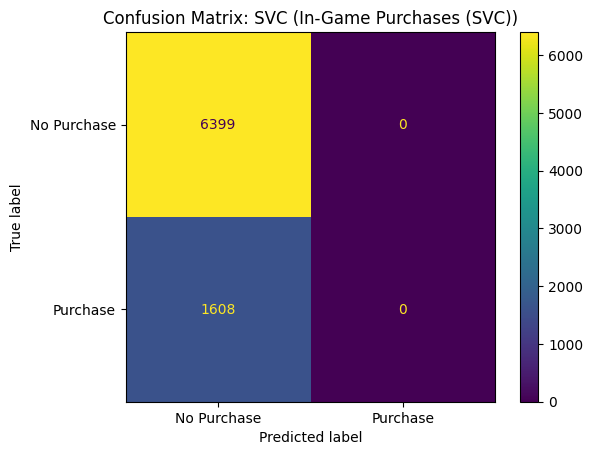

In [ ]:
print("\nEvaluating In-Game Purchases Models:")
label_names_purchases = ['No Purchase', 'Purchase']

# Train and evaluate Random Forest
best_rf_purchases, accuracies_purchases['RandomForest'] = train_and_evaluate(rf_p, X_train_p_scaled, X_test_p_scaled, y_train_p, y_test_p, 'In-Game Purchases (RandomForest)', label_names_purchases, param_grid_rf)
models_purchases['RandomForest'] = best_rf_purchases

# Train and evaluate Gradient Boosting
best_gb_purchases, accuracies_purchases['GradientBoosting'] = train_and_evaluate(gb_p, X_train_p_scaled, X_test_p_scaled, y_train_p, y_test_p, 'In-Game Purchases (GradientBoosting)', label_names_purchases, param_grid_gb)
models_purchases['GradientBoosting'] = best_gb_purchases

# Train and evaluate Logistic Regression
best_lr_purchases, accuracies_purchases['LogisticRegression'] = train_and_evaluate(lr_p, X_train_p_scaled, X_test_p_scaled, y_train_p, y_test_p, 'In-Game Purchases (LogisticRegression)', label_names_purchases, param_grid_lr)
models_purchases['LogisticRegression'] = best_lr_purchases

# Train and evaluate SVC
best_svc_purchases, accuracies_purchases['SVC'] = train_and_evaluate(svc_p, X_train_p_scaled, X_test_p_scaled, y_train_p, y_test_p, 'In-Game Purchases (SVC)', label_names_purchases, param_grid_svc)
models_purchases['SVC'] = best_svc_purchases

In evaluating the In-Game Purchase Prediction models, four algorithms—SVC, Logistic Regression, Gradient Boosting, and Random Forest—all achieved an overall accuracy of 79.92% but uniformly failed to detect players who made in-game purchases, instead predicting every instance as "No Purchase." This indicates a severe class imbalance in the dataset, as all models correctly classify non-purchasers but completely miss the minority "Purchase" class, resulting in zero precision and recall for that category. To improve detection of actual purchasers, it would be essential to apply techniques such as SMOTE for oversampling, adjust class weights, or employ undersampling of the majority class to achieve a more balanced representation during model training.

# Model Selection

In [ ]:
def select_best_model(models, accuracies):
    """
    Selects the best model based on accuracy.

    Args:
        models: Dictionary of trained models.
        accuracies: Dictionary of accuracies for each model.

    Returns:
        The name of the best model.
    """
    best_model = max(accuracies, key=accuracies.get)
    return best_model

In [ ]:
# Select the best model for Engagement Level
best_model_engage = select_best_model(models_engage, accuracies_engage)
print(f"\nBest Model for Engagement Level: {best_model_engage} with Accuracy: {accuracies_engage[best_model_engage]}")


Best Model for Engagement Level: GradientBoosting with Accuracy: 0.9176970151117771


In [ ]:
# Select the best model for In-Game Purchases
best_model_purchases = select_best_model(models_purchases, accuracies_purchases)
print(f"Best Model for In-Game Purchases: {best_model_purchases} with Accuracy: {accuracies_purchases[best_model_purchases]}")

Best Model for In-Game Purchases: RandomForest with Accuracy: 0.7991757212439116


In the model selection process, the select_best_model function was used to identify the best-performing models based on accuracy. For the Engagement Level prediction task, Gradient Boosting emerged as the best model, achieving an accuracy of approximately 91.77%. For the In-Game Purchase prediction task, Random Forest was selected as the best model, although its accuracy was limited to 79.92%, primarily due to the heavy class imbalance in the dataset. This automated selection ensures that the most accurate models are prioritized for final evaluation and potential deployment.



# Save Models

In [ ]:
# Save the best models to a single .pkl file
models_to_save = {
    'Engagement Level': models_engage[best_model_engage],
    'In-Game Purchases': models_purchases[best_model_purchases]
}

filename = 'gaming_behavior_models.pkl'
pickle.dump(models_to_save, open(filename, 'wb'))
print(f"Saved best models to {filename}")

Saved best models to gaming_behavior_models.pkl


The best-performing models for both Engagement Level and In-Game Purchases were saved into a single .pkl file for future use. A dictionary named models_to_save was created to store the selected Gradient Boosting model for engagement prediction and the Random Forest model for purchase prediction. This dictionary was then serialized and saved using Python’s pickle library into a file named gaming_behavior_models.pkl, allowing easy loading and deployment of the trained models without retraining.



# Load Models and Predict (Example)

In [ ]:
# Load the models from the .pkl file
loaded_models = pickle.load(open(filename, 'rb'))
engagement_model = loaded_models['Engagement Level']
purchases_model = loaded_models['In-Game Purchases']

# Example data with column names for engagement level prediction (10 features)
example_data_engage = pd.DataFrame({
    'Age': [30],
    'Gender': [1],
    'Location': [2],
    'PlayTimeHours': [12],
    'InGamePurchases': [0],
    'GameDifficulty': [1],
    'SessionsPerWeek': [8],
    'AvgSessionDurationMinutes': [45],
    'PlayerLevel': [30],
    'AchievementsUnlocked': [20]
})

# Example data with column names for in-game purchases prediction (9 features)
example_data_purchases = pd.DataFrame({
    'Age': [30],
    'Gender': [0],
    'Location': [2],
    'PlayTimeHours': [10],
    'GameDifficulty': [1],
    'SessionsPerWeek': [7],
    'AvgSessionDurationMinutes': [30],
    'PlayerLevel': [25],
    'AchievementsUnlocked': [150]
})

# Transform the data using the scalers
example_data_scaled_engage = scaler.transform(example_data_engage)
example_data_scaled_purchases = scaler_p.transform(example_data_purchases)

# Get predictions
engagement_prediction = engagement_model.predict(example_data_scaled_engage)
purchases_prediction = purchases_model.predict(example_data_scaled_purchases)

# Create dictionaries to map the encoded values back to the original labels
engagement_label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
purchases_label_map = {0: 'No Purchase', 1: 'Purchase'}

# Map the predictions to the original labels
predicted_engagement = engagement_label_map.get(engagement_prediction[0], 'Unknown')
predicted_purchase = purchases_label_map.get(purchases_prediction[0], 'Unknown')

# Print the predicted labels
print(f"Predicted Engagement Level for Example Data: {predicted_engagement}")
print(f"Predicted In-Game Purchases for Example Data: {predicted_purchase}")

Predicted Engagement Level for Example Data: Medium
Predicted In-Game Purchases for Example Data: No Purchase


To make the model predictions more interpretable, dictionaries were created to map the encoded numeric values back to their original categorical labels for both Engagement Level and In-Game Purchase outcomes. The model predictions were then translated using these mappings: in the example prediction shown, the player was classified as having a Medium Engagement Level and No Purchase behavior. This step ensures that final model outputs are human-readable and easy to understand for reporting or deployment purposes.